# **📶 New York City Taxi Trip Duration Prediction**

## Project for **Machine Learning Diploma📊📈**

![Taxi](../media/img.png)

---

The original dataset is from Kaggle and is used in this notebook for educational purposes. [Click here](https://www.kaggle.com/competitions/nyc-taxi-trip-duration/overview) to go to the original dataset.


###  **[Click Here To Visit New York City Taxi Trip Duration Predictor App!](https://nyctaxi.streamlit.app/)**

### By: **Sawsan Abdulbari**

---

## **Table of contents** 📝

1. [**Introduction to the Project**](#1-introduction)

2. [Importing Materials](#2-importing)

   >2.1. [Importing **Libraries** and **Modules**](#21-import-libraries)
   
   >2.2. [Loading **Data**](#22-loading-data)

3. [Data **Understanding**](#3-data-understanding)

   >3.1. [Is there **Duplicated** Data?](#31-duplicated)

   >3.2. [Are there **Missing** Values in the Data?](#32-missing-values)

   >3.3. [Are there **Outlier** Values in the Data?](#33-outlier-values)
      
4. [Exploratory Data Analysis **(EDA)**](#4-eda)

   >4.1. [**Statistical** Analysis with **Visualizations**](#41-visualizations)

      >>4.1.1. [Average Duration per **Vendor**](#411-averageduration)
      
      >>4.1.2. [Average Duration per **Store and Forward Flag**](#412-averageduration)

   >4.2. [Is there **correlation** between **numerical columns**?](#42-correlation-numerical-columns)

   >4.3. [Overview: **relationships** between **variables**](#43-Overview-relationships-columns)
   
   >4.4. [**Statistical Summary**](#44-summary)

5. [**Preprocessing** Data](#5-Preprocessing-Data)

   >5.1. [**Preprocessing** data for **Machine Learning algorithms**](#51-preprocessing)

      >>5.1.1. [Apply **log transformation** to **trip duration**](#511-logtransform)

      >>5.1.2. [**Extracting Datetime** Features](#512-datetime-features)

      >>5.1.3. [Trips per Day](#513-trips-day) 

      >>5.1.4. [**Geographic Distribution** of Trip Duration](#514-geo-dist-trips)

   >5.2. [**Feature Engineering**](#52-feature-eng)

   >>5.2.1. [Filtering **Geographic Bounds**](#521-filter-geo)

      >>5.2.2. [Creating **Geographical Features**](#522-dist-dir)

      >>>5.2.2.1 [Utilizing formula for **Haversine Distance**](#5221-haversine-dist)

      >>>5.2.2.2 [Dividing **hours to bins**](#5222-time-period)

      >>>5.2.2.3 [Utilizing formula for **Manhattan Distance**](#5223-manhattan-dist)

      >>>5.2.2.3 [Utilizing formula for **Bearing Direction**](#5224-bearing)

      >>5.2.3. [Creating **Trip Speed Feature**](#523-trip-speed)
      
      >>5.2.4. [Calculating **Airport Features**](#523-airport-feature)

   >5.3. [**Handling Outliers**](#53-outlier)

   >5.4. [Post **Feature Engineering visualizations**](#54-post-visual)

      >>5.4.1. [Visualizing **pickup and dropoff locations**](#541-plot-post)

      >>5.4.2. [**Pickup and dropoff locations** on a map](#542-map)
   
      >>5.4.3. [Visualizing **Manhattan Distance**](#543-manhattan)

      >>5.4.4. [Scatter Plotting **distance vs duration**](#544-dist-dur)

   >5.5. [**Dropping** unnecessarry **Columns**](#55-drop)

6. [**Conclusion**](#6-conclusion)


---

## 1. **Introduction** to the Project <a id="1-introduction"></a>

**Project Overview:**

Aim of this notebook is to analyze and preprocess the data to utilize it in the next step:
    Predicting the duration of taxi trips in New York City using a machine learning model. The objective is to build a model that accurately predicts the trip duration based on various features extracted from the dataset. This task is crucial for optimizing taxi services, improving customer satisfaction, and enhancing operational efficiency.
  
**Problem Statement:**

Given a set of features related to taxi trips, including geographic coordinates, timestamps, and trip-related information, the goal is to predict the duration of these trips. The challenge lies in handling the diverse and potentially noisy data to develop a robust model that generalizes well to unseen data. Hence we need to prepare the data for models to train on.


**Data Columns and Features:**

1.**id**: Unique identifier for each trip.

2.**vendor_id**: Identifier for the vendor associated with the trip.

3. **pickup_datetime**: Timestamp when the trip started.

4. **passenger_count**: Number of passengers in the taxi.

5. **pickup_longitude**: Longitude of the pickup location.

6. **pickup_latitude**: Latitude of the pickup location.

7. **dropoff_longitude**: Longitude of the dropoff location.

8. **dropoff_latitude**: Latitude of the dropoff location.

9. **store_and_fwd_flag**: Flag indicating whether the trip data was sent immediately or stored before sending.

10. **trip_duration**: Duration of the trip in seconds.


**Goal**: To prepare the data for a model to predict the total ride duration of taxi trips in New York City

* For models:

    - We will fix the model to Ridge

    - Fix its alpha to 1

    - **NOTE**:
     Why? In practice, people just try bunch of models and find their best parameters

            ■ Very systematic
* maximize the r2-score (best is 1)

**Project requirements**:
- Develop a jupyter notebook that focus on EDA (no modeling)
- Provide a python code in pycharm to train and save a model
- Provide a code that can load your model and test on sample data (csv)
- Provide a PDF that is short but descent


---

## 2. Getting **Data** and **Imports** 📚 <a id="2-importing"></a>

### 2.1. Importing **Libraries** and **Modules**  <a id="21-import-libraries"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

---

### 2.2. Loading the **Dataset** <a id="22-loading-data"></a>

In [2]:
train = pd.read_csv(r'D:\ml_projects\project-nyc-taxi-trip-duration\data\split_sample\train.csv')
val = pd.read_csv(r'D:\ml_projects\project-nyc-taxi-trip-duration\data\split_sample\val.csv')
test = pd.read_csv(r'D:\ml_projects\project-nyc-taxi-trip-duration\data\split_sample\test.csv')

---

## 3. **Understanding** the Data ❓ <a id="3-data-understanding"></a>

In [3]:
print("Dataset Head:",train.head())

Dataset Head:           id  vendor_id      pickup_datetime  passenger_count  \
0  id1385950          1  2016-01-08 22:31:12                1   
1  id1885523          2  2016-01-02 12:36:39                1   
2  id0892204          2  2016-02-21 00:24:16                1   
3  id2463973          2  2016-05-08 15:06:34                1   
4  id1496105          2  2016-05-06 13:54:36                2   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.990646        40.751068         -73.995789         40.728146   
1        -73.982658        40.745071         -74.003258         40.732971   
2        -73.999481        40.728580         -74.000252         40.718800   
3        -73.977058        40.759850         -73.949989         40.776001   
4        -73.977798        40.758221         -73.993080         40.743130   

  store_and_fwd_flag  trip_duration  
0                  N            525  
1                  N            799  
2                 

In [4]:
# Displaying the information about the dataset
print("Dataset information:",train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   object 
 1   vendor_id           5000 non-null   int64  
 2   pickup_datetime     5000 non-null   object 
 3   passenger_count     5000 non-null   int64  
 4   pickup_longitude    5000 non-null   float64
 5   pickup_latitude     5000 non-null   float64
 6   dropoff_longitude   5000 non-null   float64
 7   dropoff_latitude    5000 non-null   float64
 8   store_and_fwd_flag  5000 non-null   object 
 9   trip_duration       5000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 390.8+ KB
Dataset information: None


In [5]:
# Displaying the shape of the dataset
print("Dataset shape:", train.shape)

Dataset shape: (5000, 10)


---

### 3.1. Is there **Duplicated** Data? 🔄<a id="31-duplicated"></a>

In [6]:
print("Duplicated data amount:",train.duplicated().sum())

Duplicated data amount: 0


---

### 3.2. Are there **Missing** Values in the Data? <a id="32-missing-values"></a>

In [7]:
# Checking for missing values
print("\nMissing values in the dataset:\n")
print(train.isnull().sum())


Missing values in the dataset:

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


---

### 3.3. Are there **Outlier** Values in the Data?<a id="33-outlier-values"></a>


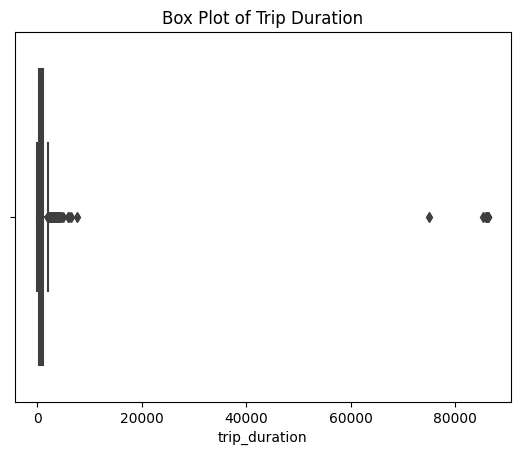

In [8]:
# Creating a box plot for 'trip_duration'
sns.boxplot(x=train['trip_duration'])
plt.title('Box Plot of Trip Duration')
plt.show()

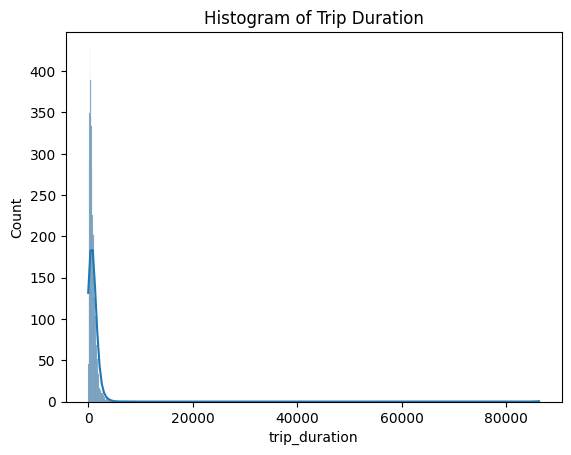

In [9]:
# Creating a histogram for 'median_house_value'
sns.histplot(train['trip_duration'], kde=True)
plt.title('Histogram of Trip Duration')
plt.show()

In [10]:
print('Outlier observation: There are clear outliers, which will be handled during pre-processing')

Outlier observation: There are clear outliers, which will be handled during pre-processing


---

## 4. Exploratory Data Analysis **(EDA)** 🔍 <a id="4-eda"></a>

In [11]:
print('Length of the dataset:',len(train))

Length of the dataset: 5000


In [12]:
train['passenger_count'].value_counts()

passenger_count
1    3542
2     734
5     300
3     208
6     137
4      79
Name: count, dtype: int64

In [13]:
train['vendor_id'].value_counts()

vendor_id
2    2600
1    2400
Name: count, dtype: int64

In [14]:
train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    4964
Y      36
Name: count, dtype: int64

In [15]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

---

### 4.1. **Statistical** Analysis with **Visualizations** <a id="41-visualizations"></a>

In [16]:
print("Statistical measures of Dataset:",train.describe().round(2))

Statistical measures of Dataset:        vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count    5000.00          5000.00           5000.00          5000.00   
mean        1.52             1.65            -73.97            40.75   
std         0.50             1.29              0.06             0.04   
min         1.00             1.00            -74.18            40.62   
25%         1.00             1.00            -73.99            40.74   
50%         2.00             1.00            -73.98            40.75   
75%         2.00             2.00            -73.97            40.77   
max         2.00             6.00            -70.85            43.02   

       dropoff_longitude  dropoff_latitude  trip_duration  
count            5000.00           5000.00        5000.00  
mean              -73.97             40.75         969.61  
std                 0.06              0.05        3616.93  
min               -74.18             40.58           2.00  
25%               

#### 4.1.1. **Average Trip Duration** per **Vendor** <a id="411-averageduration"></a>

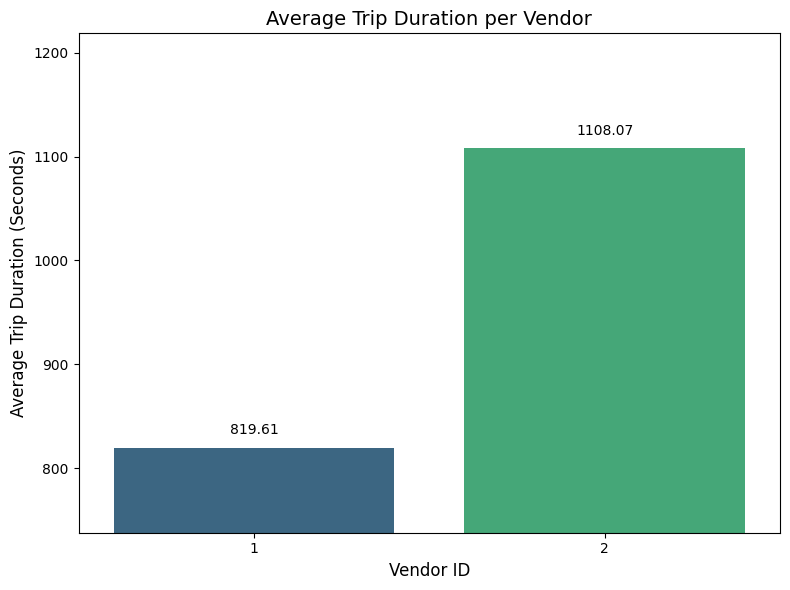

In [17]:
# Ensuring 'trip_duration' is a numeric column
train['trip_duration'] = pd.to_numeric(train['trip_duration'], errors='coerce')

# Grouping by vendor_id and the mean trip duration is calculated
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()

# Creating the bar plot with controlled figure size
plt.figure(figsize=(8, 6))  # The figure size is adjusted to avoid potential large image issues

# Creating the bar plot
ax = sns.barplot(x=plot_vendor.index, y=plot_vendor.values, palette='viridis')

# Setting the y-axis limits (adjusted based on the data, ensuring no clipping)
plt.ylim(plot_vendor.min() * 0.9, plot_vendor.max() * 1.1)

# Setting the title and labels
plt.title('Average Trip Duration per Vendor', fontsize=14)
plt.xlabel('Vendor ID', fontsize=12)
plt.ylabel('Average Trip Duration (Seconds)', fontsize=12)

# Adding the text labels on the bars
for index, value in enumerate(plot_vendor.values):
    ax.text(index, value + 10, f'{value:.2f}', ha='center', va='bottom')  # Added +10 to value to prevent overlapping

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

#### 4.1.2. **Average Trip Duration** per **Store** and **Forward Flag** <a id="412-averageduration"></a>

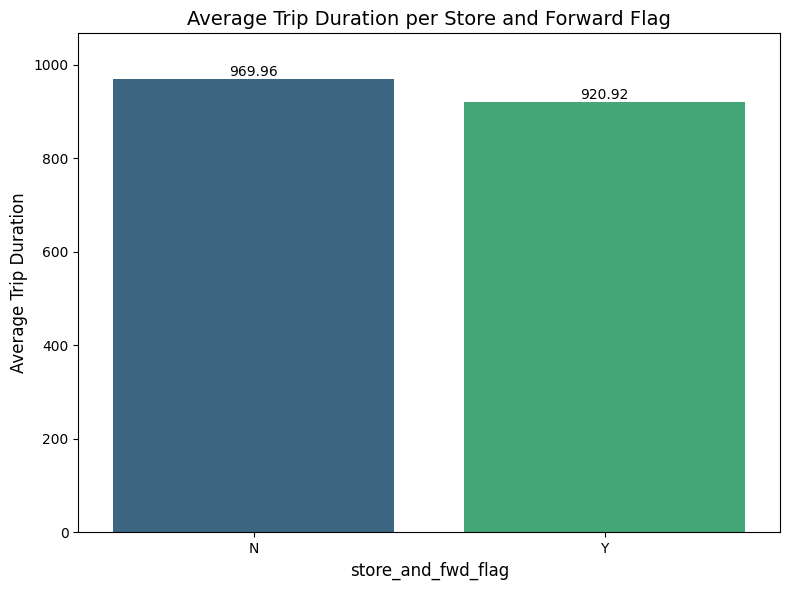

In [18]:
# Grouping by 'store_and_fwd_flag' and calculateing the mean trip duration
snwflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

# Creating the plot with controlled figure size
plt.figure(figsize=(8, 6))

# Setting the y-axis limits dynamically based on the data
plt.ylim(ymin=0, ymax=snwflag.max() * 1.1)

# Setting the title and labels
plt.title('Average Trip Duration per Store and Forward Flag', fontsize=14)
plt.xlabel('Store and Forward Flag', fontsize=12)
plt.ylabel('Average Trip Duration', fontsize=12)

# Plotting the bar plot using Seaborn and the axis object (ax)
ax = sns.barplot(x=snwflag.index, y=snwflag.values, palette='viridis')

# Annotating each bar with the average value
for index, value in enumerate(snwflag.values):
    ax.text(index, value + 0.01, str(round(value, 2)), ha='center', va='bottom')  # The vertical position is adjusted to prevent overlapping

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

---

### 4.2. What is the **correlation** between **numerical columns**? <a id="42-correlation-numerical-columns"></a>   

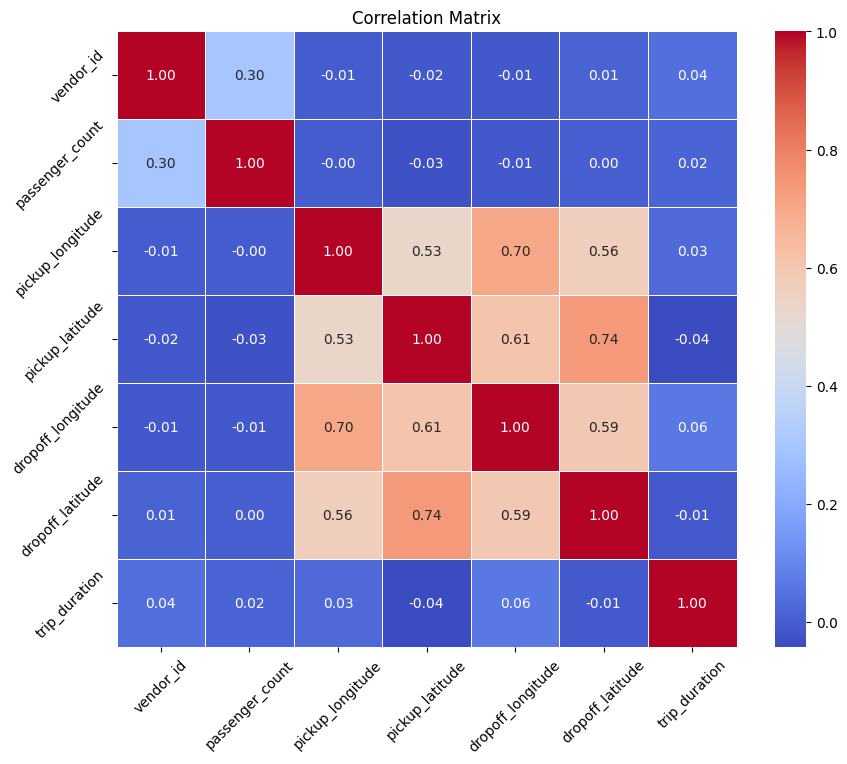

In [19]:
# Dropping non-numeric and identifier columns for correlation matrix calculation
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# Creating the heatmap with correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Setting the title
heatmap.set_title('Correlation Matrix')

# Rotating the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Showing the plot
plt.show()

---

### 4.3. **Overview** of **relationships** between the **variables**<a id="43-Overview-relationships-columns"></a>   

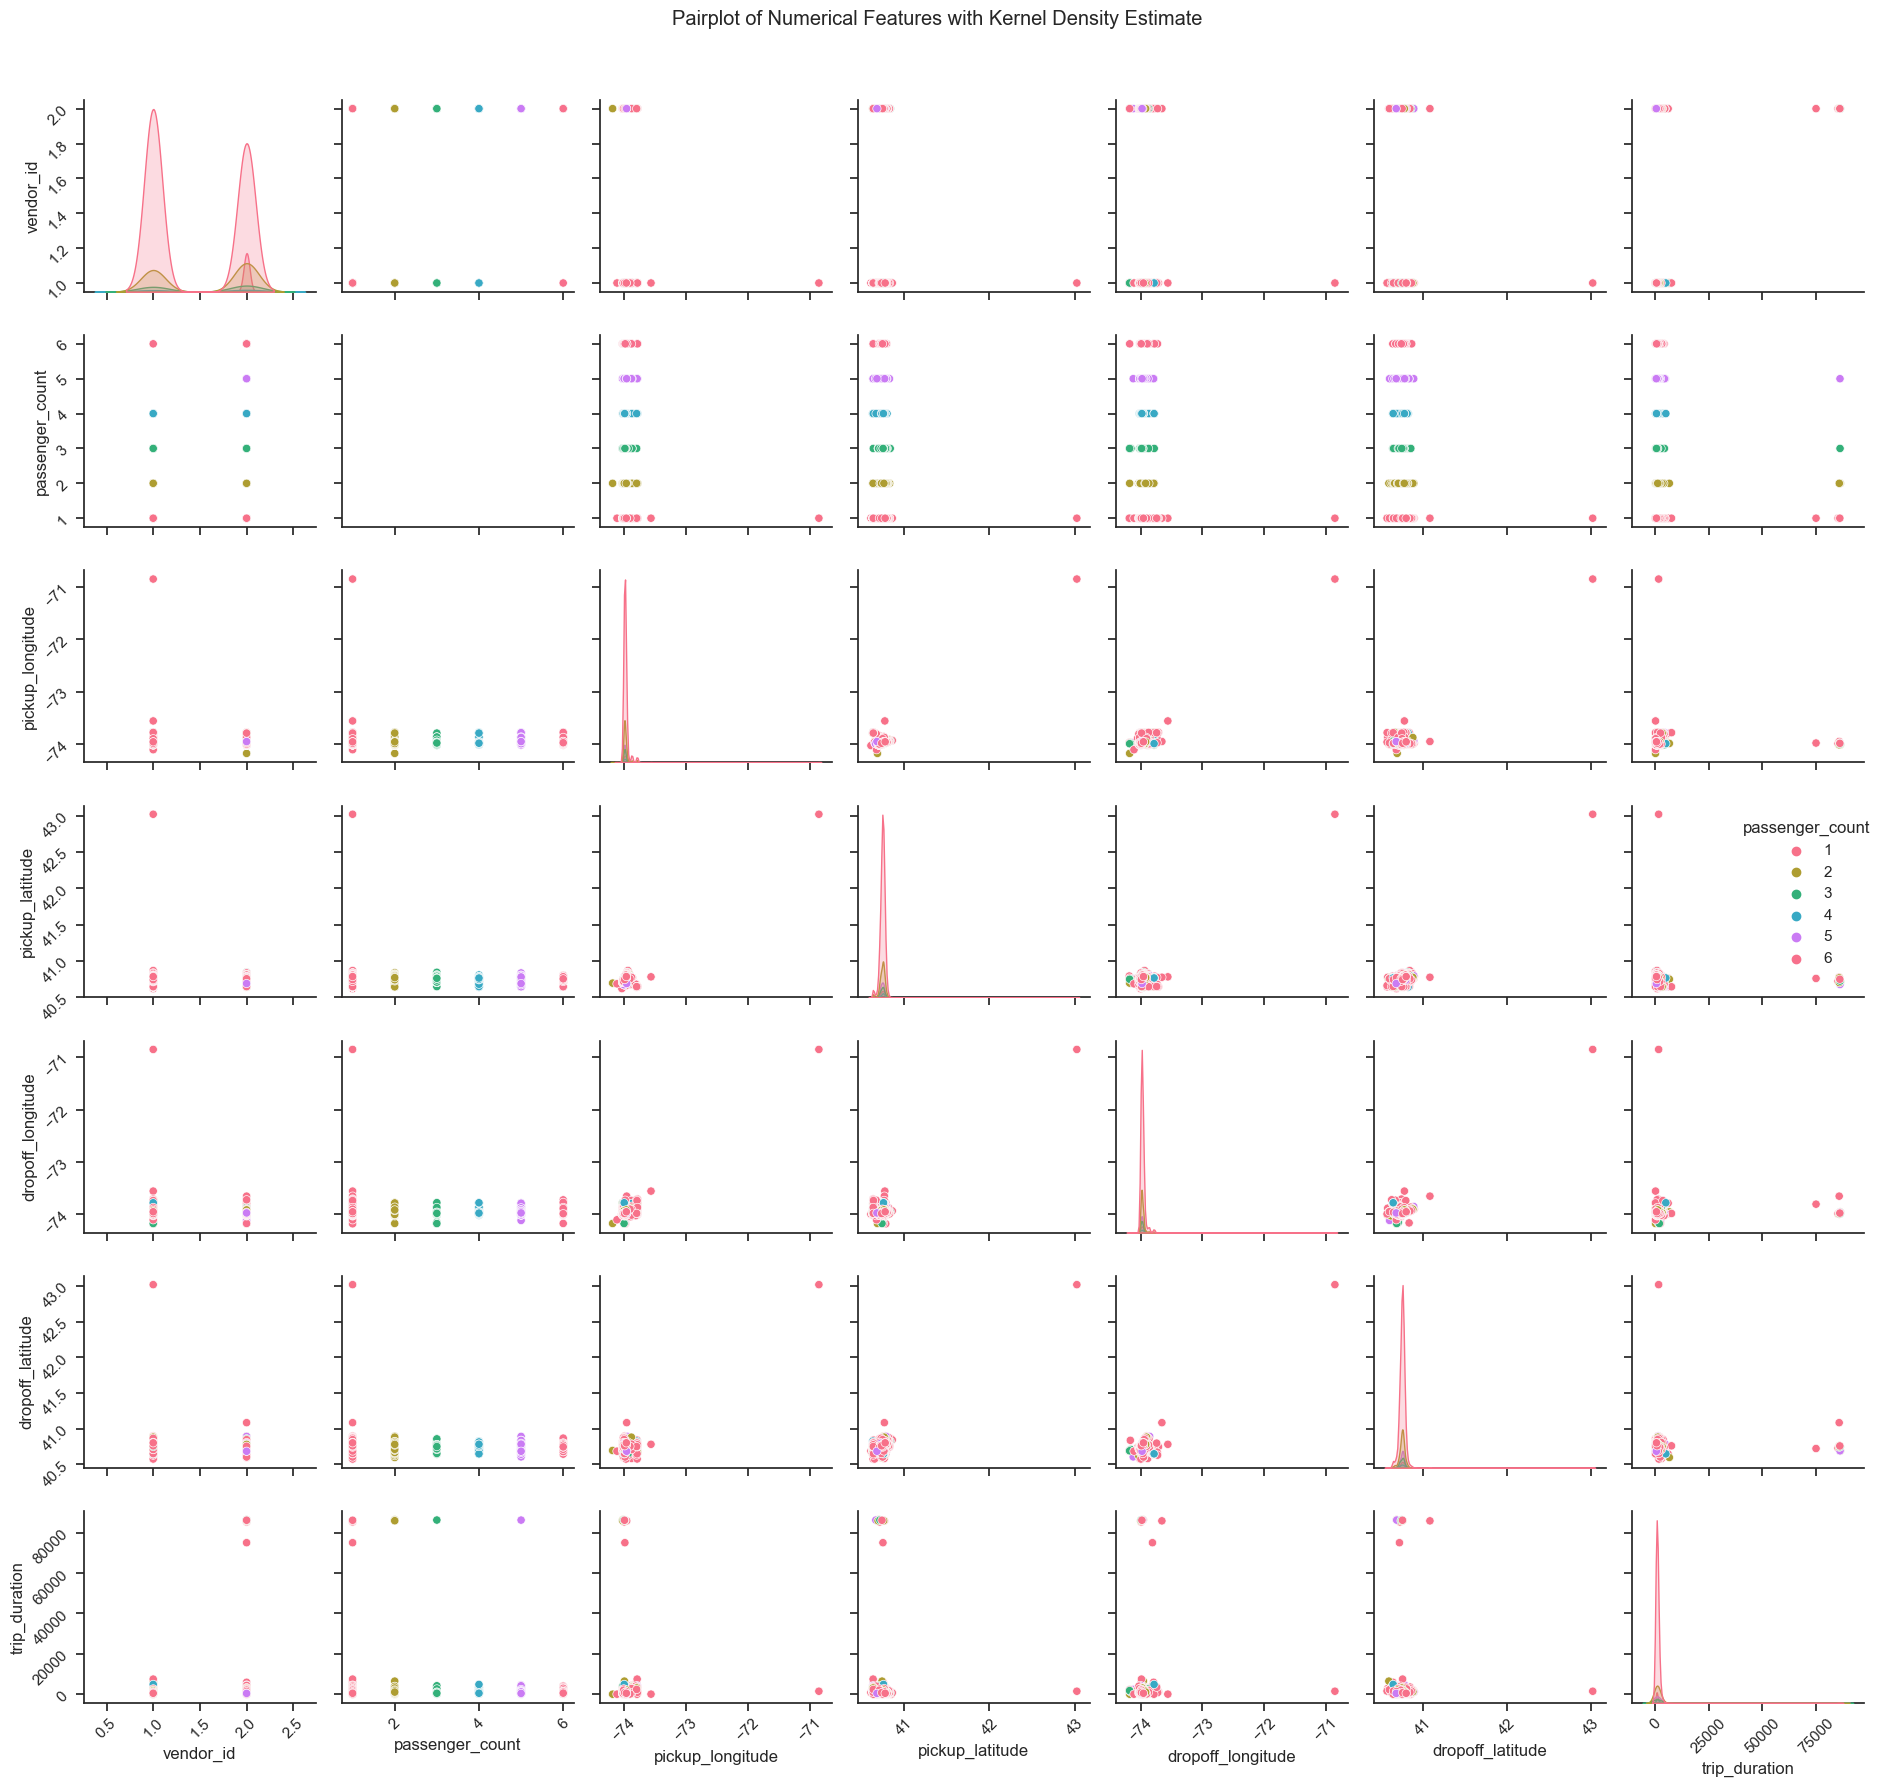

In [20]:
# Ignoreing specific warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# Setting the style
sns.set(style="ticks", color_codes=True)

# Customizing pairplot
pairplot = sns.pairplot(train, vars=numeric_cols, diag_kind='kde', hue='passenger_count', palette='husl')

# Adding a title
plt.suptitle("Pairplot of Numerical Features with Kernel Density Estimate", y=1.02)

# Rotating x-axis labels for better readability
for ax in pairplot.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    for label in ax.get_yticklabels():
        label.set_rotation(45)

# Adjusting layout to make room for the title
plt.tight_layout()

# Showing the plot
plt.show()

---

### 4.4. **Statistical Summary**<a id="44-summary"></a>   

In [21]:
# Summarizing statistics for the dataset
print("\nSummary of Statistics:")
train.describe().round(2)


Summary of Statistics:


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1.52,1.65,-73.97,40.75,-73.97,40.75,969.61
std,0.50,1.29,0.06,0.04,0.06,0.05,3616.93
min,1.00,1.00,-74.18,40.62,-74.18,40.58,2.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,392.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,656.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1066.00
max,2.00,6.00,-70.85,43.02,-70.85,43.02,86329.00


In [22]:
train.describe().round(2).T # Providing a statistical summary of the numerical columns

,count,mean,std,min,25%,50%,75%,max
vendor_id,5000.0,1.52,0.50,1.00,1.00,2.00,2.00,2.00
passenger_count,5000.0,1.65,1.29,1.00,1.00,1.00,2.00,6.00
pickup_longitude,5000.0,-73.97,0.06,-74.18,-73.99,-73.98,-73.97,-70.85
pickup_latitude,5000.0,40.75,0.04,40.62,40.74,40.75,40.77,43.02
dropoff_longitude,5000.0,-73.97,0.06,-74.18,-73.99,-73.98,-73.96,-70.85
dropoff_latitude,5000.0,40.75,0.05,40.58,40.74,40.75,40.77,43.02
trip_duration,5000.0,969.61,3616.93,2.00,392.00,656.00,1066.00,86329.00


---

## 5. **preprocessing** Data <a id="5-Preprocessing-Data"></a>
### 5.1. **Preprocessing** the data **for Machine Learning algorithms**<a id="51-preprocessing"></a>

#### 5.1.1. **Log Transformation** of Trip Duration:<a id="511-logtransform"></a>

To handle skewness, we apply a log transformation to the trip duration.

In [23]:
train['log_trip_duration'] = np.log1p(train['trip_duration'])
val['log_trip_duration'] = np.log1p(val['trip_duration'])
# Verifying the transformation by checking the first few rows
print(train[['trip_duration', 'log_trip_duration']].head())
print(val[['trip_duration', 'log_trip_duration']].head())

   trip_duration  log_trip_duration
0            525           6.265301
1            799           6.684612
2            374           5.926926
3            696           6.546785
4            703           6.556778
   trip_duration  log_trip_duration
0            374           5.926926
1            842           6.736967
2           1604           7.380879
3           1592           7.373374
4            199           5.298317


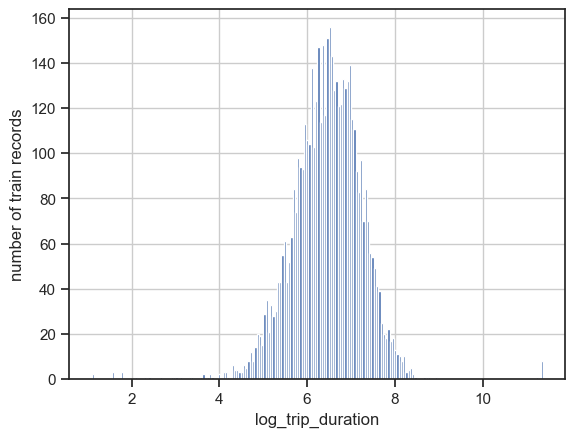

In [24]:
plt.hist(train['log_trip_duration'].values, bins=200)
plt.xlabel('log_trip_duration')
plt.ylabel('number of train records')
plt.grid()
plt.show()

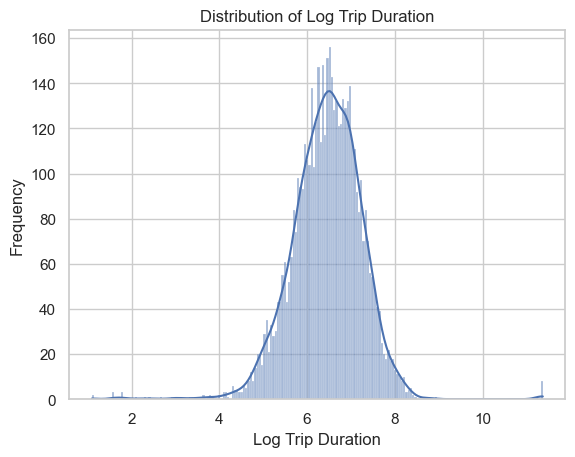

In [25]:
# Plotting the histogram
sns.set_style("whitegrid")
sns.histplot(train["log_trip_duration"], bins=200, kde=True)
plt.xlabel('Log Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Log Trip Duration')
plt.show()

#### 5.1.2. **Extracting Datetime** Features<a id="512-datetime-features"></a>

In [26]:
def extract_datetime_features(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['hour'] = df['pickup_datetime'].dt.hour
    df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    return df

train = extract_datetime_features(train)
val = extract_datetime_features(val)

The extract_datetime_features function extracts useful components from the pickup_datetime column, such as the hour, day of the week, month, and day. This helps in understanding patterns based on the time of the trip.

#### 5.1.3. Number of **Trips per Day**<a id="513-trips-day"></a>


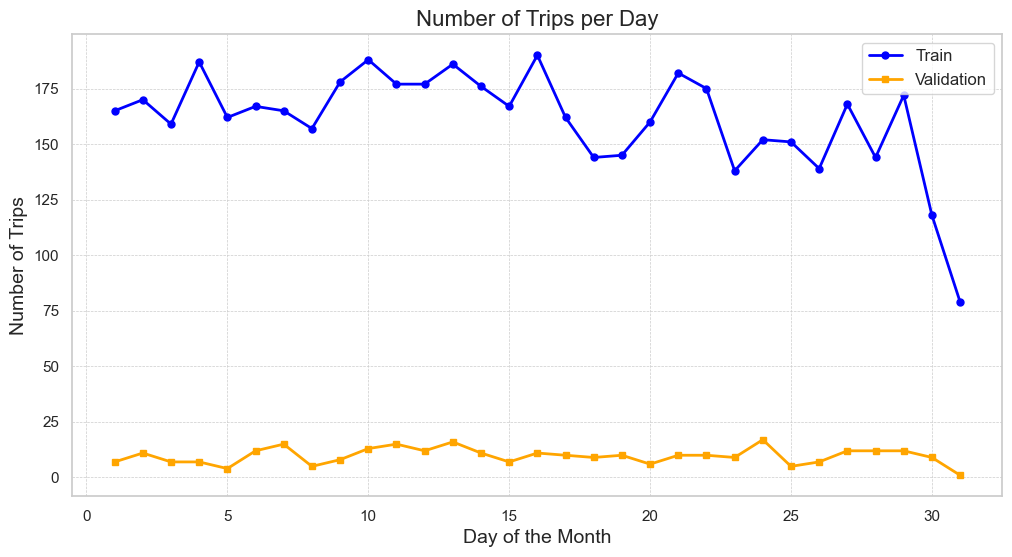

In [27]:
# Grouping the data by day and count the number of trips
train_trips_per_day = train.groupby('day').count()[['id']]
val_trips_per_day = val.groupby('day').count()[['id']]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(train_trips_per_day, 'o-', label='Train', color='blue', markersize=5, linewidth=2)
plt.plot(val_trips_per_day, 's-', label='Validation', color='orange', markersize=5, linewidth=2)

# Adding title and labels
plt.title('Number of Trips per Day', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)

# Adding legend
plt.legend(loc='best', fontsize=12)

# Customizing grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Showing the plot
plt.show()


#### 5.1.4. **Geographic Distribution** of Trip Duration <a id="514-geo-dist-trips"></a>

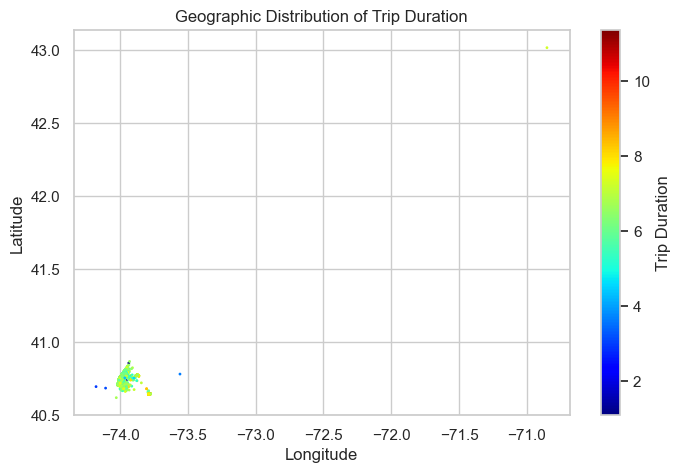

In [28]:
# Visualizing trip Duration based on Latitude and Longitude
plt.figure(figsize=(8, 5))
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], c=train['log_trip_duration'], cmap='jet', s=1)
plt.colorbar(label='Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Trip Duration')
plt.show()

 A small cluster of points and a few outliers can be seen, which may be causing the range of the axes to expand unnecessarily.

Extreme outliers will be removed in Feature Engineering to focus on the main cluster of data points.

---

### 5.2. **Feature Engineering** 🛠️ <a id="52-feature-eng"></a>

**Creating new features that could potentially improve model performance:**

#### 5.2.1. Filtering **Geographic Bounds** <a id="521-filter-geo"></a>


The geographic bounds are found online provide the central coordinates of New York City, but the city covers a larger area. We need to define the bounding box that encompasses the entire area of interest within New York City. Here are the general bounds for the five boroughs of New York City:


Northern Boundary: 40.9176° N

Southern Boundary: 40.4774° N

Eastern Boundary: -73.7004° W

Western Boundary: -74.2591° W


Source [travelmath](https://www.travelmath.com/cities/New+York,+NY) 

In [29]:
# Defining the bounds based on the general area of New York City
longitude_min, longitude_max = -74.2591, -73.7004
latitude_min, latitude_max = 40.4774, 40.9176

In [30]:
def filter_geographic_bounds(df, longitude_min, longitude_max, latitude_min, latitude_max):
    # Filtering based on pickup coordinates
    df = df[(df['pickup_longitude'] >= longitude_min) & (df['pickup_longitude'] <= longitude_max)]
    df = df[(df['pickup_latitude'] >= latitude_min) & (df['pickup_latitude'] <= latitude_max)]

    # Filtering based on drop-off coordinates
    df = df[(df['dropoff_longitude'] >= longitude_min) & (df['dropoff_longitude'] <= longitude_max)]
    df = df[(df['dropoff_latitude'] >= latitude_min) & (df['dropoff_latitude'] <= latitude_max)]

    return df

In [31]:
# Applying the filter to train and validation datasets
train = filter_geographic_bounds(train, longitude_min, longitude_max, latitude_min, latitude_max)
val = filter_geographic_bounds(val, longitude_min, longitude_max, latitude_min, latitude_max)

Visualizing the filtered geographic distribution of trip duration:

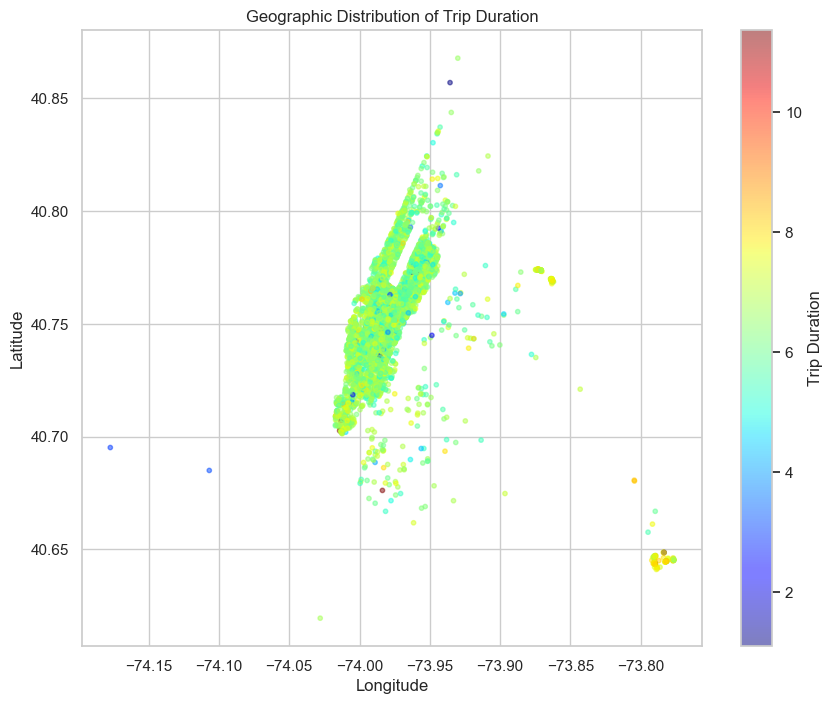

In [32]:
# Plotting the geographic distribution of trip duration
plt.figure(figsize=(10, 8))
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], 
            c=train['log_trip_duration'], cmap='jet', s=10, alpha=0.5)
plt.colorbar(label='Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Trip Duration')
plt.show()

#### 5.2.2. Creating **Geographical Features** <a id="522-dist-dir"></a>

##### 5.2.2.1. Creating **Haversine** Distance Feature<a id="5221-haversine-dist"></a>


The Haversine formula calculates the great-circle distance between two points on the Earth's surface given their latitude and longitude.

$$ d = 2r \cdot \arcsin \left( \sqrt{\sin^2\left(\frac{\Delta\varphi}{2}\right) + \cos(\varphi_1) \cdot \cos(\varphi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)} \right) $$

Where:
- $ \varphi_1, \varphi_2 $ are the latitudes of point 1 and point 2 (in radians).
- $ \lambda_1, \lambda_2 $ are the longitudes of point 1 and point 2 (in radians).
- $ \Delta\varphi = \varphi_2 - \varphi_1 $
- $ \Delta\lambda = \lambda_2 - \lambda_1 $
- $ r $ is the Earth's radius (mean radius = 6,371 km or 3,956 miles).


In [33]:

def distance(lat1, lon1, lat2, lon2, unit='km'):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 if unit == 'km' else 3956
    return c * r

train['distance_haversine'] = distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
val['distance_haversine'] = distance(val['pickup_latitude'], val['pickup_longitude'], val['dropoff_latitude'], val['dropoff_longitude'])


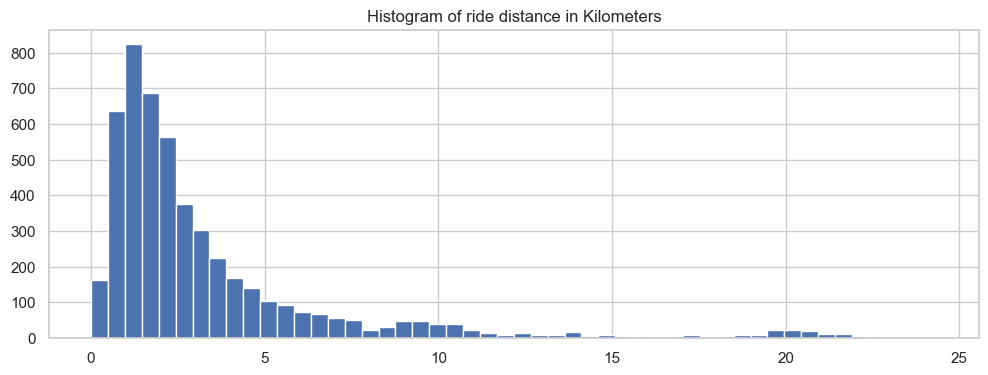

In [34]:
train["distance_haversine"].hist(bins=50, figsize=(12,4))
plt.title("Histogram of ride distance in Kilometers");

##### It seems most rides are just short rides, with a small peak at ~20 kilometers. This peak could be due to airport drives. 


In [35]:
train["distance_haversine"].describe()

count    4997.000000
mean        3.406966
std         3.839051
min         0.000000
25%         1.245878
50%         2.100779
75%         3.831999
max        24.343294
Name: distance_haversine, dtype: float64

##### 5.2.2.2. Binning hours to get 7 time periods<a id="5222-time-period"></a>

In [36]:
# Defining bins for the hours of the day
bins = [0, 6, 9, 12, 15, 18, 21, 24]
labels = ['Early Morning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night','Late Night']

# Creating a new column 'time_period' based on the hour bins
train['time_period'] = pd.cut(train['hour'], bins=bins, labels=labels, right=False)

Visualizing the Average Haversine Distance (Kilometers) by time period:

In [37]:
# Creating the pivot table
pivot = train.pivot_table("distance_haversine", index="time_period", aggfunc="mean")

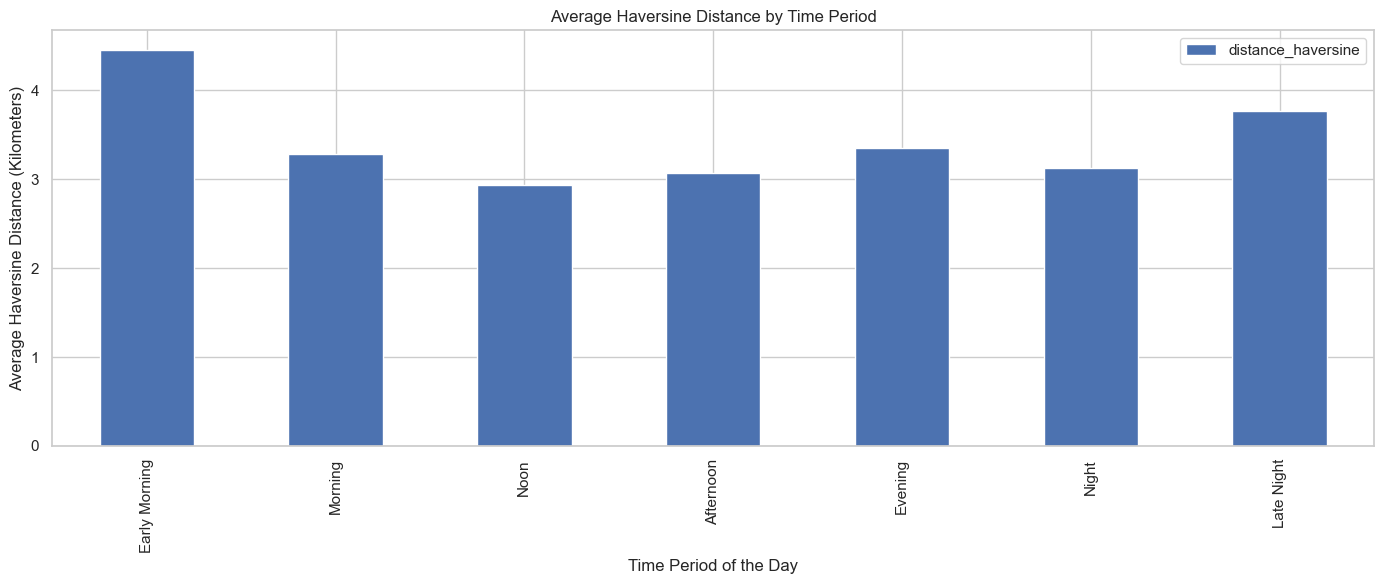

In [38]:
# Plotting the pivot table
plt.figure(figsize=(14, 6))
pivot.plot(kind='bar', ax=plt.gca())

# Customizing the plot
plt.title("Average Haversine Distance by Time Period")
plt.xlabel("Time Period of the Day")
plt.ylabel("Average Haversine Distance (Kilometers)")
plt.grid(True)
plt.tight_layout()
plt.show()



Visualizing the Average Haversine Distance (Kilometers) by Day:

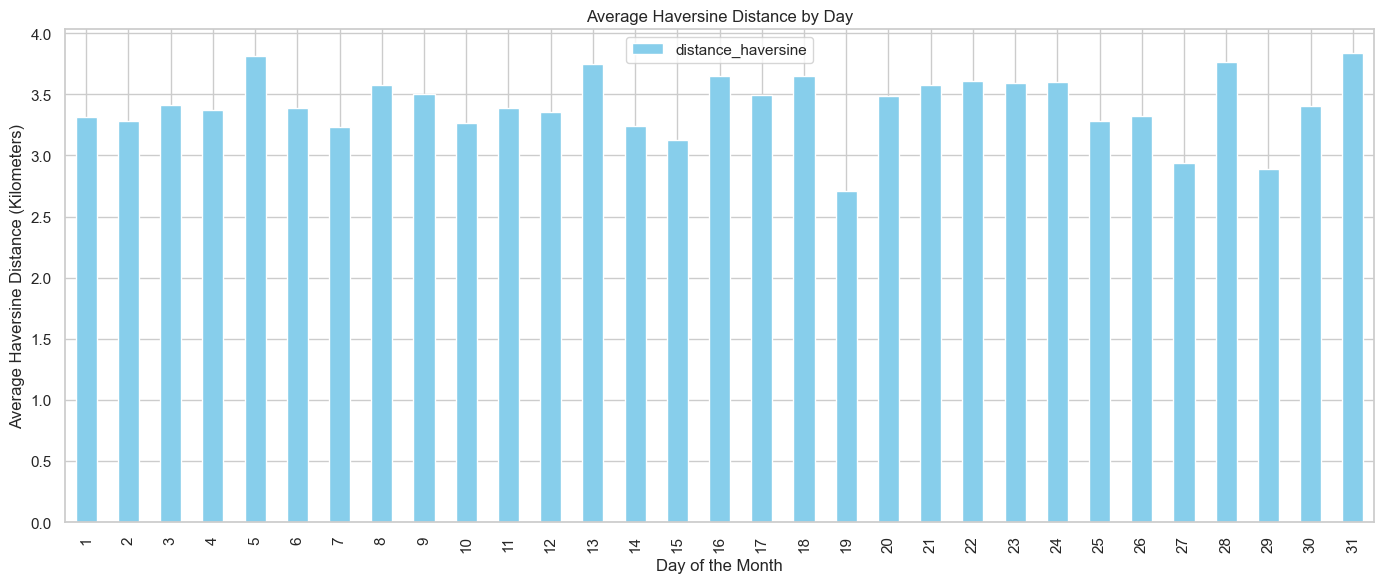

In [39]:
# Creating the pivot table
pivot = train.pivot_table("distance_haversine", index="day", aggfunc="mean")

# Plotting the pivot table
plt.figure(figsize=(14, 6))
pivot.plot(kind='bar', color='skyblue', ax=plt.gca())

# Customizing the plot
plt.title("Average Haversine Distance by Day")
plt.xlabel("Day of the Month")
plt.ylabel("Average Haversine Distance (Kilometers)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Grouping by 'passenger_count' and calculating the mean of 'distance_haversine' and 'log_trip_duration'
grouped_data = train.groupby('passenger_count')[['distance_haversine', 'log_trip_duration']].mean()

# Displaying the grouped data
print(grouped_data)


                 distance_haversine  log_trip_duration
passenger_count                                       
1                          3.343178           6.432527
2                          3.549344           6.490624
3                          3.154789           6.484381
4                          4.993268           6.738457
5                          3.380367           6.468292
6                          3.818335           6.478671


##### 5.2.2.3. Creating **Manhattan** Distance Feature<a id="5223-manhattan-dist"></a>

The Manhattan distance between two points in a grid-like path (taxi cab geometry):

$$ d_{\text{Manhattan}} = |x_1 - x_2| + |y_1 - y_2| $$

For geographic coordinates, this is approximated by:

$$ d_{\text{Manhattan}} = d_{\text{lat1, lon1, lat1, lon2}} + d_{\text{lat1, lon1, lat2, lon1}} $$


Where:
- $ d_{\text{lat1, lon1, lat1, lon2}} $ is the Haversine distance between the pickup latitude/longitude and the same latitude with dropoff longitude.
- $ d_{\text{lat1, lon1, lat2, lon1}} $ is the Haversine distance between the pickup latitude/longitude and the same longitude with dropoff latitude.


This approximates the distance traveled along a grid, which is more appropriate for city travel.


In [41]:
def manhattan_distance(lat1, lng1, lat2, lng2):
    horizontal_distance = distance(lat1, lng1, lat1, lng2)
    vertical_distance = distance(lat1, lng1, lat2, lng1)
    return horizontal_distance + vertical_distance

# Applying the corrected function to the datasets
train['distance_manhattan'] = manhattan_distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
val['distance_manhattan'] = manhattan_distance(val['pickup_latitude'], val['pickup_longitude'], val['dropoff_latitude'], val['dropoff_longitude'])


**Horizontal Distance and Vertical Distance**: The distance from the pickup location to the same latitude as the drop-off location, but keeping the pickup longitude. 

The function manhattan_distance is intended to approximate the Manhattan distance, which is the distance a taxi would travel in a grid-like path typical for city streets. The function works by first calculating the horizontal distance (latitude difference) and then the vertical distance (longitude difference).

##### 5.2.2.4 Creating **Bearing** Direction Feature<a id="5224-bearing"></a>

For geographic coordinates, this is approximated by:

$$ d_{\text{Manhattan}} = d_{\text{lat1, lon1, lat1, lon2}} + d_{\text{lat1, lon1, lat2, lon1}} $$

Where:
- $ \varphi_1, \varphi_2 $ are the latitudes of point 1 and point 2 (in radians).
- $ \lambda_1, \lambda_2 $ are the longitudes of point 1 and point 2 (in radians).
- $ \Delta\lambda = \lambda_2 - \lambda_1 $

The direction from the pickup to the dropoff location.

In [42]:
def bearing_array(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dLon = lon2 - lon1
    x = np.sin(dLon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dLon)
    bearing = np.arctan2(x, y)
    bearing = np.degrees(bearing)
    return (bearing + 360) % 360

train['direction'] = bearing_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
val['direction'] = bearing_array(val['pickup_latitude'], val['pickup_longitude'], val['dropoff_latitude'], val['dropoff_longitude'])


The function bearing_array is used to calculate the bearing (direction) from the pickup location to the dropoff location. The bearing is the angle measured clockwise from the north direction to the line connecting the starting and ending points.

#### 5.2.3. Creating **Trip speed Features** <a id="523-trip-speed"></a>

We calculate the speed of the trip, which is the distance divided by the trip duration in hours.

The speed of the trip in km/h:

$$ \text{trip\_speed} = \frac{\text{distance\_haversine}}{\text{trip\_duration} / 3600} $$


In [43]:
train['trip_speed'] = train['distance_haversine'] / (train['trip_duration'] / 3600)
val['trip_speed'] = val['distance_haversine'] / (val['trip_duration'] / 3600)

In [44]:
# Displaying the first few rows of the training dataset to verify trip_speed calculation
print(train[['distance_haversine', 'trip_duration', 'trip_speed']].head())

# Displaying the first few rows of the testing dataset to verify trip_speed calculation
print(val[['distance_haversine', 'trip_duration', 'trip_speed']].head())

   distance_haversine  trip_duration  trip_speed
0            2.585424            525   17.728622
1            2.195988            799    9.894316
2            1.089522            374   10.487373
3            2.902086            696   15.010790
4            2.114919            703   10.830312
   distance_haversine  trip_duration  trip_speed
0            1.157519            374   11.141895
1            2.368537            842   10.126760
2            8.813654           1604   19.781269
3            3.763381           1592    8.510159
4            0.653817            199   11.827851


#### 5.2.4. Creating **Airport Features** <a id="523-airport-feature"></a>

We create binary features indicating whether the pickup or dropoff location is near major airports (JFK, LGA, EWR).

In [45]:
def create_airport_features(df):
    jfk_bounds = (-73.8352, -73.7401, 40.6195, 40.6659)
    lga_bounds = (-73.8895, -73.8522, 40.7664, 40.7931)
    ewr_bounds = (-74.1925, -74.1594, 40.6700, 40.7081)

    def in_bounds(lat, lon, bounds):
        lon_min, lon_max, lat_min, lat_max = bounds
        return (lat_min <= lat <= lat_max) and (lon_min <= lon <= lon_max)

    df['pickup_jfk'] = df.apply(lambda x: in_bounds(x['pickup_latitude'], x['pickup_longitude'], jfk_bounds), axis=1)
    df['pickup_lga'] = df.apply(lambda x: in_bounds(x['pickup_latitude'], x['pickup_longitude'], lga_bounds), axis=1)
    df['pickup_ewr'] = df.apply(lambda x: in_bounds(x['pickup_latitude'], x['pickup_longitude'], ewr_bounds), axis=1)

    df['dropoff_jfk'] = df.apply(lambda x: in_bounds(x['dropoff_latitude'], x['dropoff_longitude'], jfk_bounds), axis=1)
    df['dropoff_lga'] = df.apply(lambda x: in_bounds(x['dropoff_latitude'], x['dropoff_longitude'], lga_bounds), axis=1)
    df['dropoff_ewr'] = df.apply(lambda x: in_bounds(x['dropoff_latitude'], x['dropoff_longitude'], ewr_bounds), axis=1)
    return df

train = create_airport_features(train)
val = create_airport_features(val)


Explanation of Bounds:

The specific bounds for each airport are chosen based on the geographic coordinates that roughly cover the airport area. The chosen bounds ensure that any taxi trip starting or ending within these coordinates is considered to be near the respective airport.


This function enriches the dataset with additional features that may help the model to better understand the effect of airport proximity on trip duration. These features can be particularly useful as trips to and from airports may have different characteristics compared to other trips in the city.

---

### 5.3 **Removing Outliers** <a id="53-outlier"></a>

To remove outliers from a dataset, we use the method of excluding data points that fall outside a certain number of standard deviations from the mean. This helps in reducing the effect of extreme values that might skew the results.

#### Formula
1. Calculate the mean ($ \mu $) and standard deviation ($ \sigma $) of the data.
2. Define the lower and upper bounds as follows:
    - Lower Bound: $ \mu - n \cdot \sigma $
    - Upper Bound: $ \mu + n \cdot \sigma $

Where:
- $ \mu $ is the mean of the data.
- $ \sigma $ is the standard deviation of the data.
- $ n $ is the number of standard deviations (e.g., $ n = 2 $).

#### Implementation
Data points that fall outside the defined lower and upper bounds are considered outliers and are removed from the dataset.

#### Mathematical Representation

$$ \text{Lower Bound} = \mu - n \cdot \sigma $$

$$ \text{Upper Bound} = \mu + n \cdot \sigma $$

Where:
- $ \mu $ is the mean of the column values.
- $ \sigma $ is the standard deviation of the column values.
- $ n $ is the number of standard deviations, typically set to 2 for this process.


Finally, we remove outliers from the log_trip_duration column to avoid their undue influence on the model.


In [46]:
def remove_outliers(df, column, n_std=2):
    m = np.mean(df[column])
    s = np.std(df[column])
    lower_bound = m - n_std * s
    upper_bound = m + n_std * s
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

train = remove_outliers(train, 'log_trip_duration', n_std=2)


This function removes rows from the DataFrame that have values in a specified column which are more than a certain number of standard deviations away from the mean. This helps to reduce the influence of extreme values on the model.

---

### 5.4. **Visualization** post **Feature Engineering**<a id="54-post-visual"></a>

#### 5.4.1. Visualizing pickup and dropoff locations<a id="541-plot-post"></a>  

Creating a high-resolution scatter plot for pickup and dropoff locations:

In [47]:
# Defining the bounding box for the area of interest
bounding_box = (-74.2591, -73.7004, 40.4774, 40.9176 )

In [48]:
# Creating a function to filter data within the bounding box
def select_within_boundingbox(df, bounding_box):
    return ((df["pickup_longitude"] >= bounding_box[0]) & (df["pickup_longitude"] <= bounding_box[1]) & 
            (df["pickup_latitude"] >= bounding_box[2]) & (df["pickup_latitude"] <= bounding_box[3]) &
            (df["dropoff_longitude"] >= bounding_box[0]) & (df["dropoff_longitude"] <= bounding_box[1]) &
            (df["dropoff_latitude"] >= bounding_box[2]) & (df["dropoff_latitude"] <= bounding_box[3]))

In [49]:
# Filtering the train and validation data
train = train[select_within_boundingbox(train, bounding_box)]
val = val[select_within_boundingbox(val, bounding_box)]

In [50]:
# Creating function to plot high-resolution scatter plot of pickup and dropoff locations
def plot_hires(df, BB, figsize=(5,5), ax=None, c=('r', 'b')):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)
    plt.show()

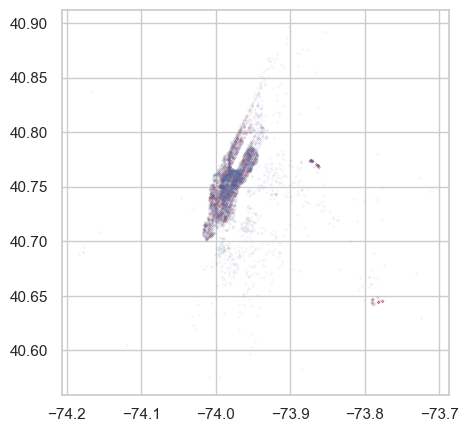

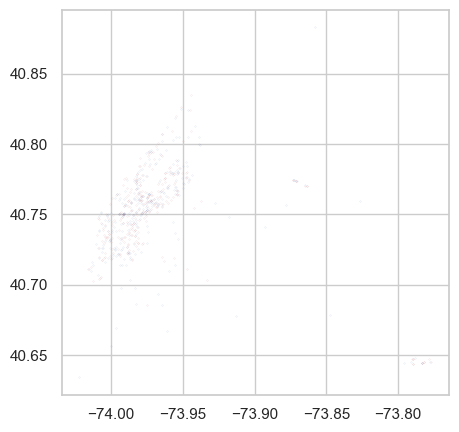

In [51]:
# Plotting high-resolution scatter plot for train and validation datasets
plot_hires(train, bounding_box)
plot_hires(val, bounding_box)

#### 5.4.2. **Plot pickup and dropoff** locations on a **map**<a id="542-map"></a>

An actual map of the specified area is loaded for visualization purposes where Pickup and Dropoff locations then are visualized.

In [54]:
# Load the actual NYC map image
nyc_map = plt.imread(r'D:\ml_projects\project-nyc-taxi-trip-duration\media\nyc_map.png')

[img source](https://www.openstreetmap.org/export#map=8/41.702/-72.757)

In [55]:
# Creating a function to plot pickup and dropoff locations on a map
def plot_on_map(df, bound_box, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha=alpha, c='r', s=s)
    axs[0].set_xlim((bound_box[0], bound_box[1]))
    axs[0].set_ylim((bound_box[2], bound_box[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=bounding_box)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"], alpha=alpha, c='b', s=s)
    axs[1].set_xlim((bound_box[0], bound_box[1]))
    axs[1].set_ylim((bound_box[2], bound_box[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=bound_box)
    plt.show()

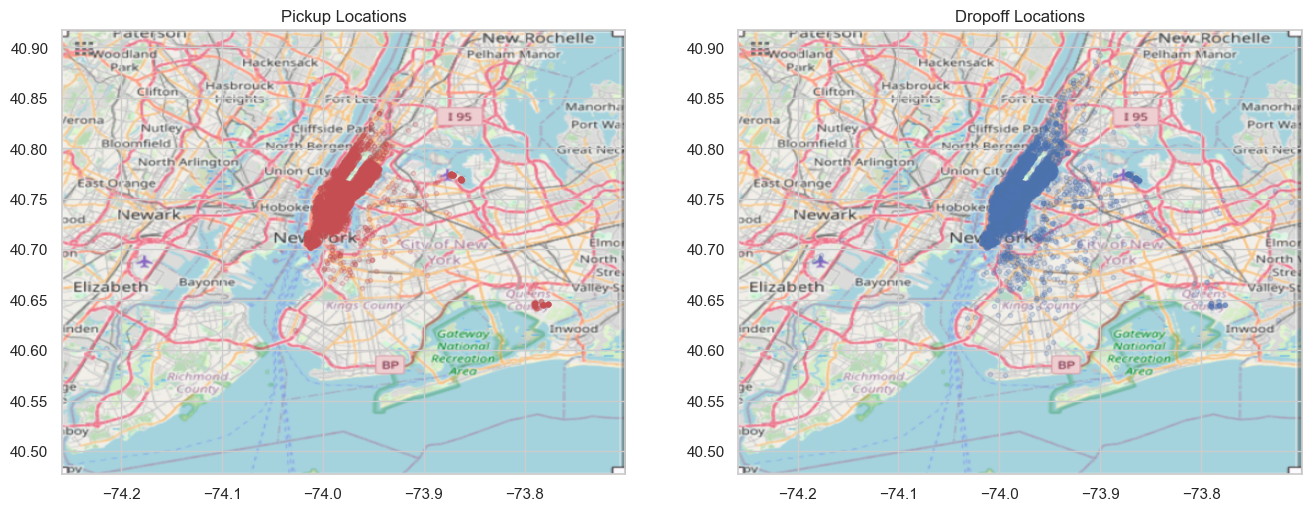

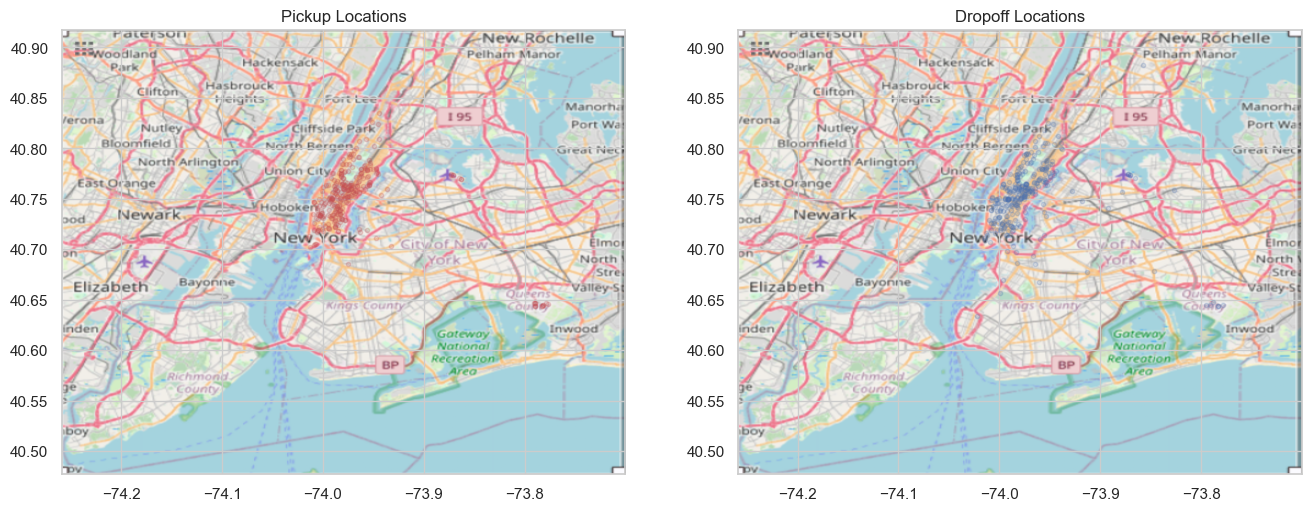

In [56]:
# Plotting locations on a map for train dataset using the actual NYC map image
plot_on_map(train, bounding_box, nyc_map)
plot_on_map(val, bounding_box, nyc_map)

#### 5.4.3. **Manhattan Distance** visualization<a id="543-manhattan"></a>

we need accurate geographic coordinates for the northernmost, southernmost, easternmost, and westernmost points of Manhattan. Here are the precise coordinates for Manhattan:

- **Northern Boundary**: 40.882214 (approximately around Inwood)

- **Southern Boundary**: 40.679547 (approximately around Battery Park)

- **Eastern Boundary**: -73.907 (around the East River near Randall's Island)

- **Western Boundary**: -74.047285 (around the Hudson River)

In [57]:
# Using bounding box focusing on NYC for Manhattan
bound_box_manhattan = (-74.047285, -73.907, 40.679547, 40.882214)

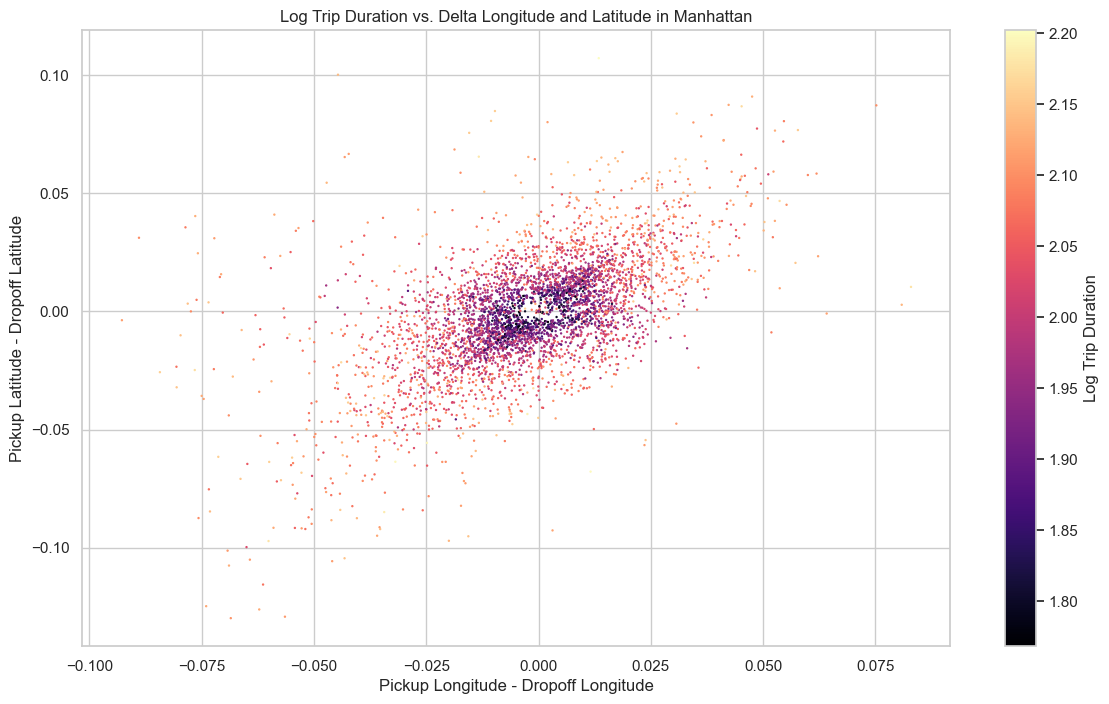

In [58]:
idx_manhattan = select_within_boundingbox(train, bound_box_manhattan)
# Calculating delta longitude and latitude
train['delta_lon'] = train['pickup_longitude'] - train['dropoff_longitude']
train['delta_lat'] = train['pickup_latitude'] - train['dropoff_latitude']

# Plotting the scatter plot with Manhattan distance
plt.figure(figsize=(14, 8))
plt.scatter(train.loc[idx_manhattan, 'delta_lon'], train.loc[idx_manhattan, 'delta_lat'], 
            s=0.5, alpha=1.0, c=np.log1p(train.loc[idx_manhattan, 'log_trip_duration']), cmap="magma")
plt.colorbar(label='Log Trip Duration')
plt.xlabel('Pickup Longitude - Dropoff Longitude')
plt.ylabel('Pickup Latitude - Dropoff Latitude')
plt.title('Log Trip Duration vs. Delta Longitude and Latitude in Manhattan')
plt.show()

#### 5.4.4. **Scatter** Plotting **distance vs duration**<a id="544-dist-dur"></a>

Text(0.5, 1.0, 'Zoom in on distance < 15 kilometers and trip_duration')

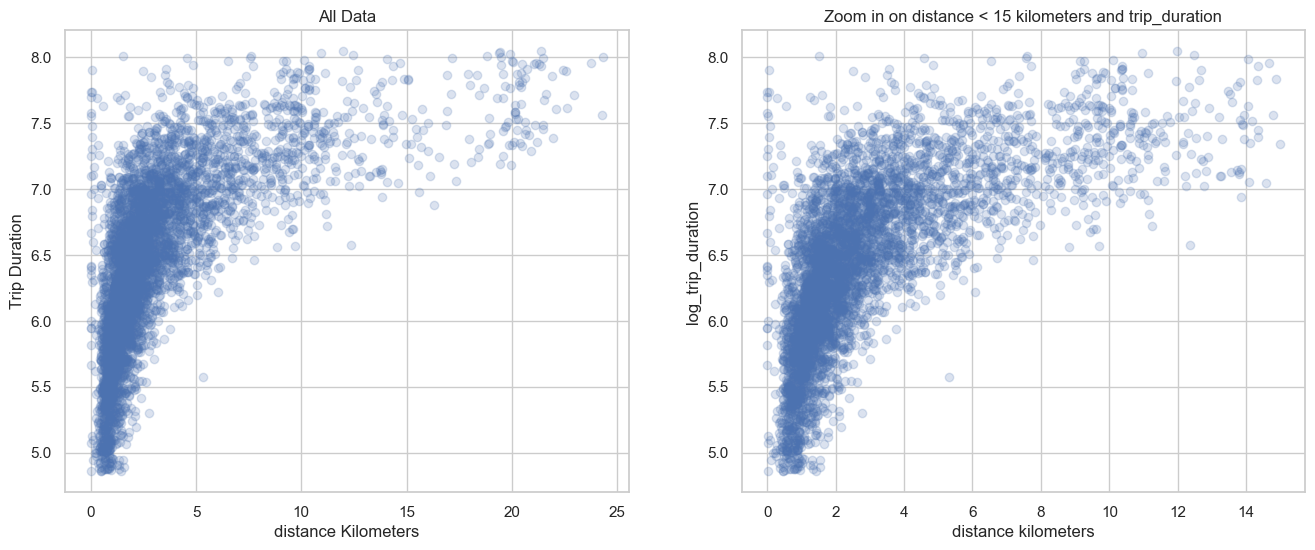

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(train["distance_haversine"], train["log_trip_duration"], alpha=0.2)
axs[0].set_xlabel("distance Kilometers")
axs[0].set_ylabel("Trip Duration")
axs[0].set_title("All Data")

# Zoom-in to a part of the data
idx = ((train['distance_haversine'] < 15) & (train["log_trip_duration"] < 100))
axs[1].scatter(train[idx]["distance_haversine"], train[idx]["log_trip_duration"], alpha=0.2)
axs[1].set_xlabel("distance kilometers")
axs[1].set_ylabel("log_trip_duration")
axs[1].set_title("Zoom in on distance < 15 kilometers and trip_duration")

---

### 5.5. **Dropping Unnecessary Columns**<a id="55-drop"></a>

We drop columns that are no longer needed for the modeling process, such as IDs and the original pickup_datetime.


In [60]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'hour', 'dayofweek', 'month', 'day',
       'distance_haversine', 'time_period', 'distance_manhattan', 'direction',
       'trip_speed', 'pickup_jfk', 'pickup_lga', 'pickup_ewr', 'dropoff_jfk',
       'dropoff_lga', 'dropoff_ewr', 'delta_lon', 'delta_lat'],
      dtype='object')

In [61]:
train = train.drop(columns=['id', 'pickup_datetime', 'time_period','delta_lon','delta_lat','trip_duration'], errors='ignore')
val = val.drop(columns=['id', 'pickup_datetime', 'trip_duration'], errors='ignore')

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4826 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           4826 non-null   int64  
 1   passenger_count     4826 non-null   int64  
 2   pickup_longitude    4826 non-null   float64
 3   pickup_latitude     4826 non-null   float64
 4   dropoff_longitude   4826 non-null   float64
 5   dropoff_latitude    4826 non-null   float64
 6   store_and_fwd_flag  4826 non-null   object 
 7   log_trip_duration   4826 non-null   float64
 8   hour                4826 non-null   int32  
 9   dayofweek           4826 non-null   int32  
 10  month               4826 non-null   int32  
 11  day                 4826 non-null   int32  
 12  distance_haversine  4826 non-null   float64
 13  distance_manhattan  4826 non-null   float64
 14  direction           4826 non-null   float64
 15  trip_speed          4826 non-null   float64
 16  pickup_jfk 

----

## 6. **Conclusion**: <a id="6-conclusion"></a>

### Exploratory Data Analysis (EDA) revealed key patterns and insights from the data:

- **Temporal Features**: Extracted hour, day of the week, month, and day from the pickup datetime.

- **Geographical Features**: Calculated distances (Haversine and Manhattan) and directions between pickup and dropoff locations.

- **Airport Proximity**: Created binary features for proximity to major airports (JFK, LGA, EWR).

- **Trip Speed**: Calculated as the distance divided by the trip duration in hours.

- **Log Transformation**: Applied to trip duration to handle skewness.

These features were critical in improving model performance across different approaches.